## Spectral Analysis Examples

In [128]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
import xrft

## Simple Example

This version produces 2 sin functions, combines them, then produces a spectral analysis curve.

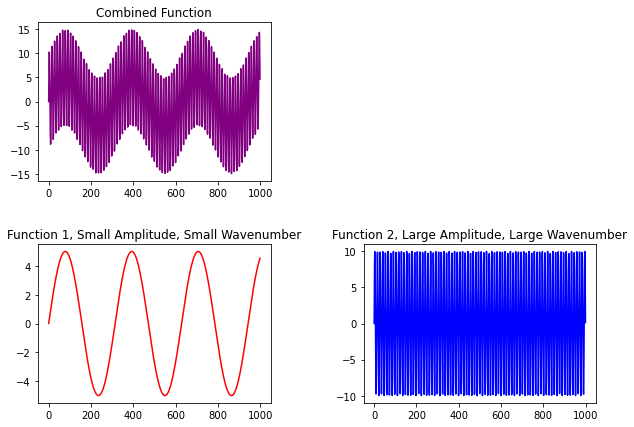

In [169]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

a1, k1 = (5,20)
a2, k2 = (10,500)

title1 = "Function 1"
title2 = "Function 2"
if a1>a2:
    title1+=", Large Amplitude"
    title2+=", Small Amplitude"
else:
    title1+=", Small Amplitude"
    title2+=", Large Amplitude"
if k1>k2:
    title1+=", Large Wavenumber"
    title2+=", Small Wavenumber"
else:
    title1+=", Small Wavenumber"
    title2+=", Large Wavenumber"


y1 = np.sin(k1*(x/points))*a1
y2 = np.sin(k2*(x/points))*a2
yt = y1+y2

plt.subplot(2,2,1)
plt.plot(x, yt, color='purple')
plt.title("Combined Function")

plt.subplot(2,2,3)
plt.plot(x,y1, color='r')
plt.title(title1)

plt.subplot(2,2,4)
plt.plot(x,y2, color='blue')
plt.title(title2)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Text(0, 0.5, 'Amplitude')

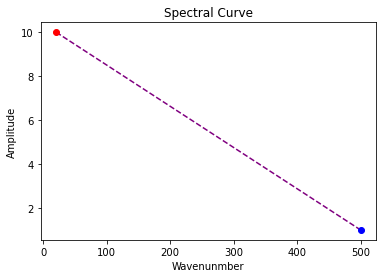

In [167]:
x = [k1,k2]
y = [a1,a2]

plt.plot(x,y, linestyle='dashed', color='purple')
plt.plot(k1,a1, marker='o', color='red')
plt.plot(k2,a2, marker='o', color='blue')
plt.title("Spectral Curve")
plt.xlabel("Wavenunmber")
plt.ylabel("Amplitude")

## Complex Example

This test produces 6 sin functions, combines them, plots k vs a for each, and plots a trendline.

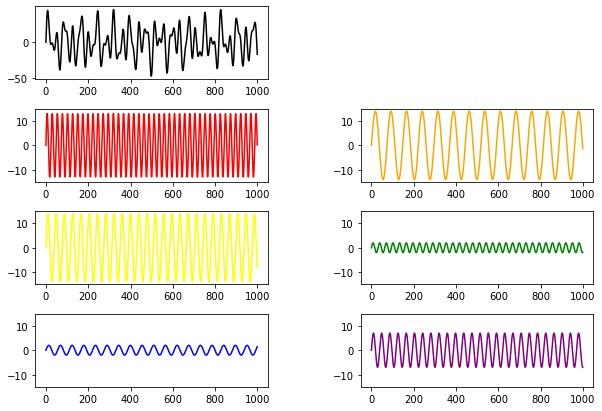

In [121]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

#define variables for plot color, amplitude and wavenumber
#define an empty list and function for y
color_li = ['red','orange','yellow','green','blue','purple']
a_li = np.random.randint(1,15,6)
k_li = np.random.randint(10,300,6)
y_li = []
y_funct = 0

#define np arrays for the trendline to work
k = np.array(k_li)
a = np.array(a_li)

#define each sin function, add it to the empty list, and plot it
for n in range(0,6):
    y = np.sin(k[n]*(x/points))*a[n]
    y_li.append(y)

    plt.subplot(4,2,n+3)
    plt.plot(x,y, color=color_li[n])
    plt.ylim(-15,15)

#define the sum of all equations
for y in y_li:
    y_funct =y_funct + y

#plot the sum of all equations
plt.subplot(4,2,1)
plt.plot(x,y_funct, color='black')
plt.subplots_adjust(wspace=0.4, hspace=0.4) 

(0.0, 15.0)

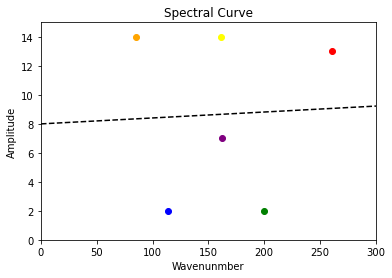

In [122]:
#for each sin function, plot wavenumber vs amplitude
for n in range(0,6):
    plt.scatter(k_li[n], a_li[n], marker='o', color=color_li[n])

#plot the trendline of all the functions
z=np.polyfit(k_li, a_li, 1)
p=np.poly1d(z)
plt.plot(x,p(x), color='black', linestyle='dashed')

plt.title("Spectral Curve")
plt.xlabel("Wavenunmber")
plt.ylabel("Amplitude")
plt.xlim(0,300)
plt.ylim(0,15)

## More Complex Example

Creates an xarray da that contains k, a, color and uses xrft to conduct the spectral analysis (haven't figured out xrft yet)

In [157]:
points = 1000
x = np.arange(points)

#define variables for plot color, amplitude and wavelength
#define an empty list and function for y
color_li = ['red','orange','yellow','green','blue','purple']
a_li = np.random.randint(1,15,6)
k_li = np.random.randint(10,300,6)
y_li = []
y_funct = 0

#create an xarray data array that contains amplitude, wavenumber, and color
da = xr.DataArray(dims=['a','k', 'color'], coords={'a':a_li, 'k':k_li, 'color':color_li})

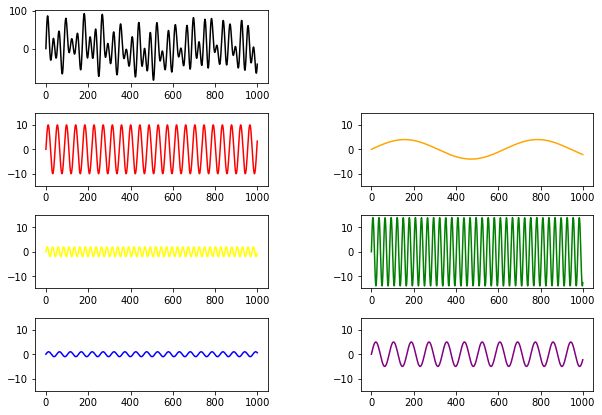

In [159]:
plt.figure(figsize=(10,7))

#define each sin function, add it to the empty list, and plot it
for n in range(0,6):
    y = np.sin(int(da.k[n])*(x/points))*int(da.a[n])
    y_li.append(y)

    plt.subplot(4,2,n+3)
    plt.plot(x,y, color=color_li[n])
    plt.ylim(-15,15)

#define the sum of all equations
for y in y_li:
    y_funct =y_funct + y

#plot the sum of all equations
plt.subplot(4,2,1)
plt.plot(x,y_funct, color='black')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [160]:
#CT_spec = xrft.power_spectrum(CT_data.dropna(dim='dives') - CT_data.mean('dives'), dim='ctd_pressure', window=True)

In [161]:
xrft.power_spectrum

<function xrft.xrft.power_spectrum(da, dim=None, real_dim=None, scaling='density', window_correction=False, **kwargs)>

In [165]:
xrft.power_spectrum(da)

ValueError: Can't take Fourier transform because coodinate a is not evenly spaced